# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(X_train))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
50000


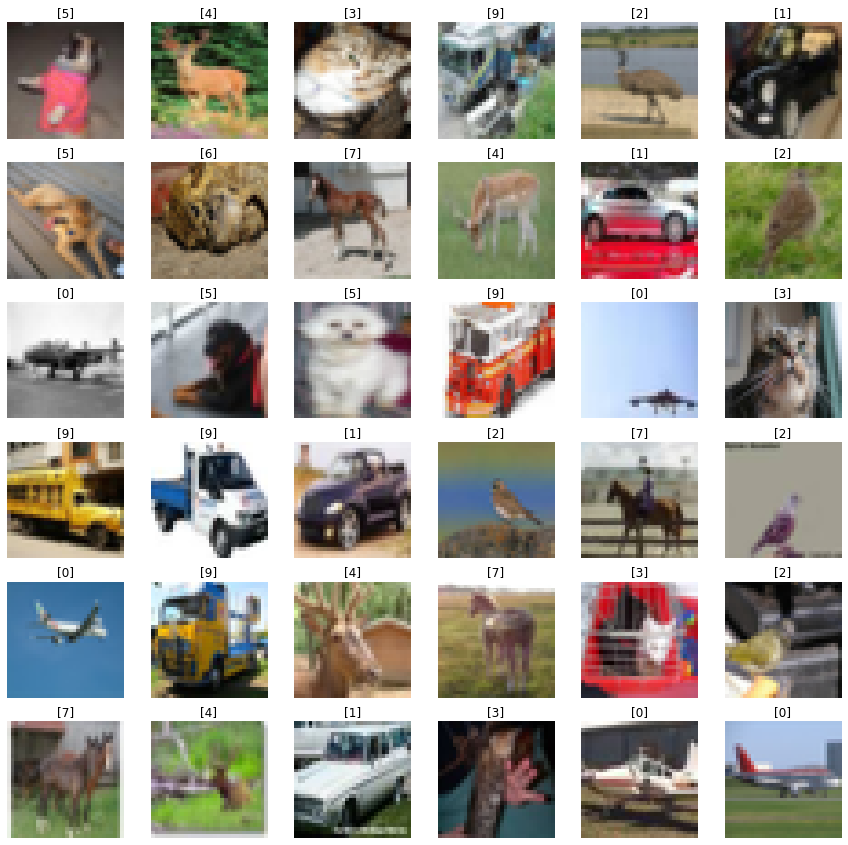

In [7]:
length=6
width=6
fig,axes=plt.subplots(length,width,figsize=(15,15))
axes=axes.ravel()

for i in range(0,length*width):
    idx=np.random.randint(0,len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(y_train[idx])
    axes[i].axis('off')

In [41]:
#normalizing inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [42]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils 

In [43]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [44]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [45]:
model=Sequential()

In [46]:
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=500) 


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 297s 6ms/step - loss: 3.4354 - accuracy: 0.2019 - val_loss: 1.9768 - val_accuracy: 0.2888
Epoch 2/5
50000/50000 [==============================] - 300s 6ms/step - loss: 1.7258 - accuracy: 0.3661 - val_loss: 1.6891 - val_accuracy: 0.4033
Epoch 3/5
50000/50000 [==============================] - 283s 6ms/step - loss: 1.5679 - accuracy: 0.4233 - val_loss: 1.5513 - val_accuracy: 0.4520
Epoch 4/5
50000/50000 [==============================] - 278s 6ms/step - loss: 1.4658 - accuracy: 0.4658 - val_loss: 1.4637 - val_accuracy: 0.4955
Epoch 5/5
50000/50000 [==============================] - 283s 6ms/step - loss: 1.3612 - accuracy: 0.5073 - val_loss: 1.3010 - val_accuracy: 0.5493


In [48]:
model.evaluate(X_test,y_test)
y_pred=model.predict_classes(X_test)
y_pred,score

10000/10000 [==============================] - 17s 2ms/step


(array([1, 8, 1, ..., 3, 1, 1], dtype=int64),
 [1.3009524839401245, 0.5493000149726868])

In [49]:
y_test=y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0, 931,   0,   0,   0,   0,   0,   0,  69,   0],
       [  0, 879,   0,   0,   0,   0,   0,   0, 121,   0],
       [  0, 903,   0,   1,   0,   0,   0,   0,  91,   5],
       [  2, 849,   0,   1,   0,   0,   0,   0, 133,  15],
       [  0, 937,   0,   0,   0,   0,   0,   0,  62,   1],
       [  2, 884,   0,   4,   0,   0,   0,   0, 100,  10],
       [  0, 929,   0,   0,   0,   0,   0,   0,  70,   1],
       [  1, 855,   0,   0,   0,   0,   0,   0, 138,   6],
       [  0, 884,   0,   0,   0,   0,   0,   0, 115,   1],
       [  1, 741,   0,   0,   0,   0,   0,   0, 255,   3]], dtype=int64)